<hr style="border:1px solid #808080">                                                                                                                   </hr>
<h1 style="color:#0176DE;text-align:center;margin:0;padding-top:0;"> <b>Ayudantía 6 - Regresión no lineal</b>                                                                           </h1>
<h1 style="color:#0176DE;text-align:center;margin:0;padding-top:0;"> <b>IBM/ICE2020 Introducción a la Biomecánica</b>                                                                           </h1>
<p style=padding:0;margin:0>
<h3 style="color:#c1ccdb;text-align:center;margin:0;padding:0;"> Profesor - <span style="color:#dbdbdb;text-align:center;"><b>Daniel Hurtado</b></span></h3>
<h3 style="color:#c1ccdb;text-align:center;margin:0;padding:0;">Ayudantes - <span style="color:#dbdbdb;text-align:center;"><b>Bastián Herrera, Victoria Alfaro, Jorge Villagra</b></span>                               </h3> 
</p>
<h4 style="color:#dbdbdb;text-align:center;margin:0;padding:0;">Instituto de Ingeniería Biológica y Médica<br>Escuela de Ingeniería<br>  Pontificia Universidad Católica de Chile <br>    </h4>
<hr style="border:1px solid #808080">  

La primera sección de este tutorial está basado en los tutoriales hechos por Pablo Zurita para ediciones anteriores de este curso.

Muchas veces, vamos a tener un modelo físico que, sujeto a parámetros, **creemos que** determina algún fenómeno. Esta situación puede representarse abstractamente por

\begin{align}
    f : V \times \Theta & \to W \\
    (\boldsymbol{x}, \boldsymbol{\theta}) & \mapsto \boldsymbol{y}
\end{align}

es decir, $f$ es nuestro modelo que dado un _input_ $\boldsymbol{x}$ y ciertos parámetros representados como entradas de un vector $\boldsymbol{\theta}$, entregue un _output_ $\boldsymbol{y}$ que **creemos** que refleja la realidad. Un problema común en ciencias e ingeniería es, dados ciertos datos $\{(\boldsymbol{x}_{i}, \boldsymbol{y}_{i})\}_{i}$ intentar determinar qué parámetros de mi modelo son necesarios para que este pueda representar (de mejor manera) el fenómeno que dio paso a esos datos.

Hay muchas maneras de aproximarse a este [**problema inverso**](https://en.wikipedia.org/wiki/Inverse_problem) de determinar qué se necesita para producir el _output_. La que vamos a explorar aquí es una de las más simples, y es una que, de hecho, probablemente ya han utilizado: **mínimos cuadrados**.

La idea es la siguiente: dado que queremos reproducir los datos, podemos definir el error de nuestra estimación, dado un input $\boldsymbol{x}_{i}$ como

$$
    e_{i} := \lVert f(\boldsymbol{x}_{i}, \boldsymbol{\theta}) - \boldsymbol{y}_{i} \rVert
$$

y luego queremos encontrar los parámetros que **minimizan** el error. Si $W \subset \mathbb{R}$, lo anterior es equivalente a

$$
    \min_{\boldsymbol{\theta}} \lvert f(\boldsymbol{x}_{i}, \boldsymbol{\theta}) - y_{i} \rvert^{2}
$$

y si queremos que esto suceda para todas las observaciones, tenemos entonces

$$
    \min_{\boldsymbol{\theta}} \sum_{i} \lvert f(\boldsymbol{x}_{i}, \boldsymbol{\theta}) - y_{i} \rvert^{2} \text{.}
$$

Nosotros resolveremos este problema de manera numérica haciendo uso de la librería `scipy`, en específico su módulo `scipy.optimize`. Consideremos el siguiente ejemplo. Imaginemos que

$$
    f(x, \boldsymbol{\theta}) = \theta_{1} - \left( x - \frac{\theta_{2}}{x^{2}} \right)
$$

y que tenemos datos

$$
    \mathbf{y} = (0, 0.008936176, 0.01787232, 0.02382976, 0.04765952) \text{.}
$$

asociados a los puntos

$$
    \mathbf{x} = (0, 0.0097561, 0.0184669, 0.023345, 0.0348432)
$$

In [1]:
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
y_data = np.array([0.008936176, 0.01787232, 0.02382976, 0.04765952])
x_data = np.array([0.0097561, 0.0184669, 0.023345, 0.0348432])

def f(c, x):
    c1, c2 = c
    return c1 - (x - (c2/x**2))

La función `leastsq` del módulo `scipy.optimize` realiza optimización numérica sobre el problema de mínimos cuadrados dado un planteamiento como el anterior. La optimización numérica utiliza un punto de partida (y, en general, este punto de partida puede afectar el resultado de la optimización). Por ahora, escojamos arbitrariamente un vector inicial, las propiedades del problema, y las exigencias del curso, nos permiten tomarnos esos lujos. Debemos además definir el error.

In [3]:
c_0 = [1, 1]

def error(c, x, y):
    return abs(y - f(c, x))

Ahora, llamando a la función, podemos encontrar el óptimo.

In [4]:
c_fit, cov_c = sp.leastsq(func=error, x0=c_0, args=(x_data, y_data))

`c_fit` retorna los parámetros ajustados, y `cov_c` retorna una medida de la geometría del punto óptimo encontrado

In [5]:
c_fit

array([ 6.59279319e-02, -4.90786933e-06])

Podemos visualizar lo que sucedió ahora gráficamente, pues podemos **simular** utilizando los parámetros ajustados.

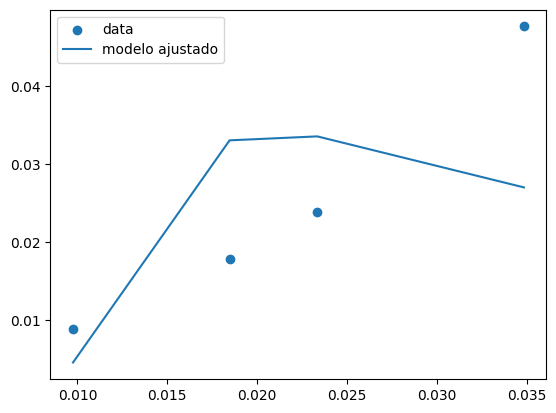

In [6]:
plt.figure()
plt.scatter(x_data, y_data, label='data')
plt.plot(x_data, f(c_fit, x_data), label='modelo ajustado')
plt.legend()
plt.show()

De este gráfico podemos ver que nuestro modelo funcionó... bastante mal. De esto tendríamos que concluir que, a la luz de los datos **disponibles**, $f$ no es un buen modelo del comportamiento visto en los datos. ¿Quizás hay otro modelo que sirva mejor?

In [7]:
def g(c, x):
    return c[0] + c[1]*x + c[2]*x**2

c_0 = [1, 1, 1]

def error_g(c, x, y):
    return abs(y - g(c, x))

c_fit_g, cov_c = sp.leastsq(func=error_g, x0=c_0, args=(x_data, y_data))

In [8]:
c_fit_g

array([ 6.26561648e-03, -6.27063686e-02,  3.58291785e+01])

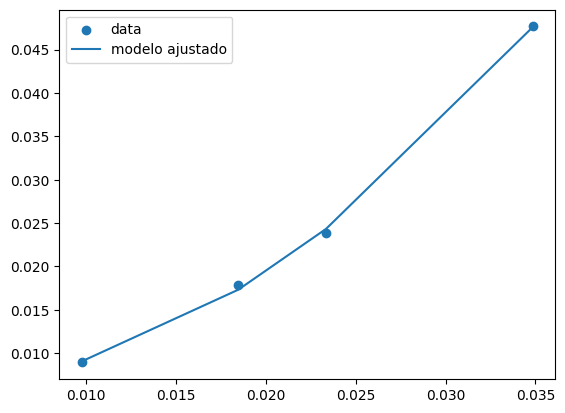

In [9]:
plt.figure()
plt.scatter(x_data, y_data, label='data')
plt.plot(x_data, g(c_fit_g, x_data), label='modelo ajustado')
plt.legend()
plt.show()

¡Ajá! Pareciera que un modelo cuadrático captura bastante mejor el comportamiento de los datos. Por supuesto, esto **no significa mucho desde el punto de vista físico**. Recordemos que uno puede aproximar cualquier función real continua en un intervalo cerrado y acotado (compacto) arbitrariamente bien utilizando polinomios (los señores Weierstrass y Stone nos entregaron [este bello resultado](https://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem)), así que por supuesto que uno puede jugar con un modelo hasta ajustar perfecto a **cualquier conjunto de datos**. Lo que nos interesa (al menos a nosotros) es que un modelo con **interpretación física** se ajuste bien.

Probemos ahora con los datos de Birzle (2019).

In [10]:
p_birzle = []
J_birzle = []
with open("./birzle2019.csv", "r") as file:
    for row in file:
            p_birzle.append(float(row.split(";")[1].strip("\n").strip().replace(',', '.')))
            J_birzle.append(float(row.split(";")[0].strip("\n").strip().replace(',', '.')))


p_birzle = np.asarray(p_birzle, dtype='float64')*98.0665 # conversión cmH2O a Pa, las constantes de referencia están en Pa.
J_birzle = np.asarray(J_birzle, dtype='float64')

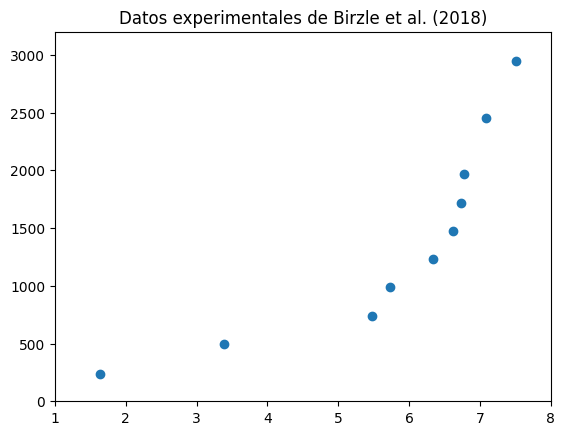

In [11]:
plt.figure()
plt.title("Datos experimentales de Birzle et al. (2018)")
plt.xlim(1, 8)
plt.ylim(0, 3200)
plt.scatter(J_birzle, p_birzle)
plt.show()

Densidad de energía de deformación de Birzle et al. (2018):

$W(I_1,I_3) = c(I_1-3) + \frac{c}{\beta}(I_3^{-\beta}-1)+c_d(I_1-3)^6$, donde $I_1 = \text{tr} C = 3J^{2/3}$, y $I_3 = J^2=\det C$, considerando que $C=F^T F$ describe el experimento de expansión volumétrica isotrópica con

$$
F = \begin{bmatrix}
    \lambda & 0 & 0\\ 0 & \lambda & 0\\ 0&0&\lambda
\end{bmatrix}.
$$

Con esto, la presión es $p=\frac{\partial W}{\partial J} = 2c(J^{-1/3}-2J^{-2\beta-1}) + 12c_dJ^{-1/3}(3J^{2/3}-3)^5$.

Parámetros a ajustar: $c$, $\beta$ y $c_d$. 

Valores iniciales: $c=200$, $\beta=1$, $c_d=0.010$.

In [12]:
def p_J(cs, J):
    first_term = 2*cs[0]*(J**(-1/3)-J**(-2*cs[1]-1))
    second_term = 12*cs[2]*J**(-1/3)*(3*J**(2/3)-3)**5
    return first_term + second_term

c_0_birzle = [200, 1, 0.010]

def error_birzle(cs, Js, ps):
    return abs(ps - p_J(cs, Js))
    
c_fit_birzle, _ = sp.leastsq(func=error_birzle, x0=c_0_birzle, args=(J_birzle, p_birzle))

In [13]:
# Sanity check: si reemplazamos J=1 en la expresión de la presión, debemos tener p=0.

assert(np.isclose(p_J(c_0_birzle, 1), 0))

# Parámetros ajustados

print(f"Parámetros ajustados: c = {np.round(c_fit_birzle[0],3)}, beta = {np.round(c_fit_birzle[1],3)}, c_d = {np.round(c_fit_birzle[2],6)}")

Parámetros ajustados: c = 148.125, beta = 3.122, c_d = 0.009808


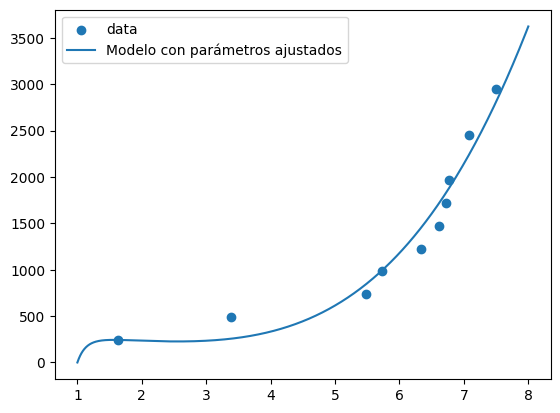

In [14]:
Jspace = np.linspace(1,8,1000)

plt.figure()
plt.scatter(J_birzle, p_birzle, label='data')
plt.plot(Jspace, p_J(c_fit_birzle, Jspace), label='Modelo con parámetros ajustados')
plt.legend()
plt.show()

In [15]:
c_birzle = [286.61, 1.1738, 0.008238]

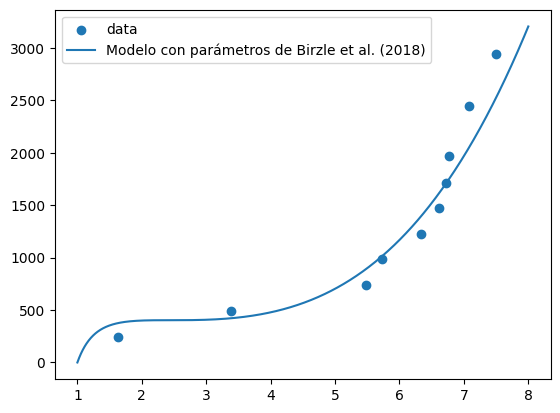

In [16]:
plt.figure()
plt.scatter(J_birzle, p_birzle, label='data')
plt.plot(Jspace, p_J(c_birzle, Jspace), label='Modelo con parámetros de Birzle et al. (2018)')
plt.legend()
plt.show()

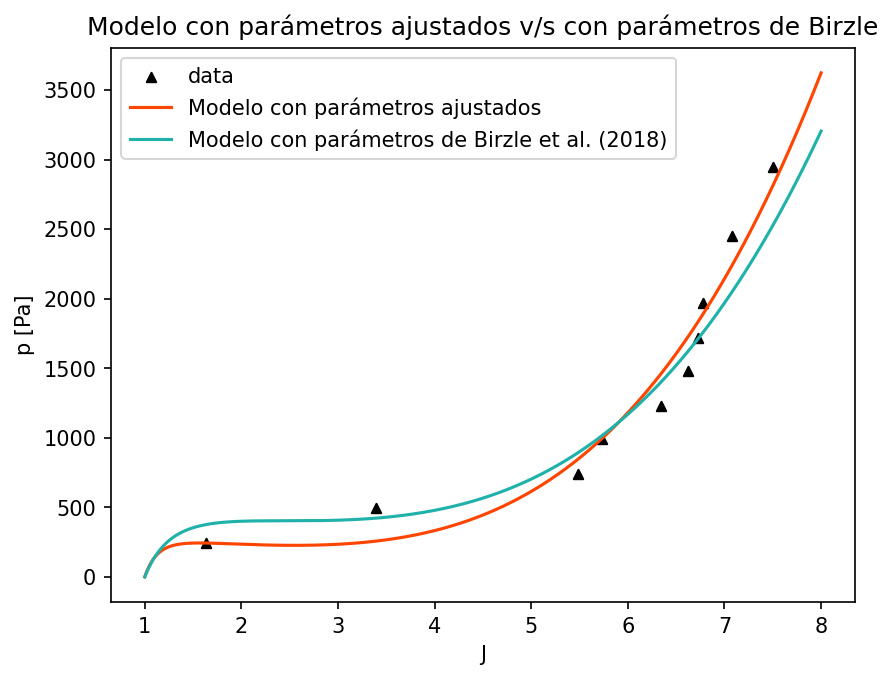

In [17]:
# Ambos modelos superpuestos

plt.figure(dpi=150)
plt.title("Modelo con parámetros ajustados v/s con parámetros de Birzle")
plt.scatter(J_birzle, p_birzle, s=20, c="#000000", marker = "^", label='data')
plt.xlabel("J")
plt.ylabel("p [Pa]")
plt.plot(Jspace, p_J(c_fit_birzle, Jspace), color='orangered', label='Modelo con parámetros ajustados')
plt.plot(Jspace, p_J(c_birzle, Jspace), color='lightseagreen', label='Modelo con parámetros de Birzle et al. (2018)')
plt.legend()
plt.show()

Propuesto, y para pensar: calculen el error cuadrático total en los datos.